## Sample I 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import statistics

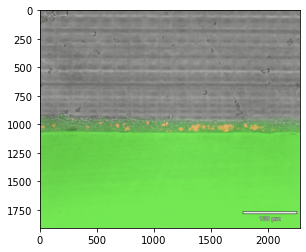

13038159


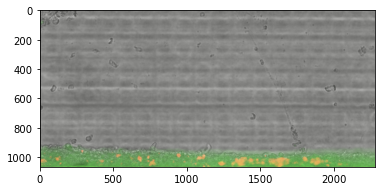

In [43]:
image_data = imread("uncropped_Day 6_0005_zoverlay.jpg")
# image_data = imread("Day 6_0003_zoverlay.jpg")
plt.imshow(image_data)
plt.show()
print(image_data.size)

all_r = []
all_g = []
all_b = []
sum_rgb = []
row_num = 0
stop_row = None

for row in range(len(image_data)):
    r_current_row = []
    for column in range(len(image_data[row])):
        r = int(image_data[row][column][0])
        g = int(image_data[row][column][1])
        b = int(image_data[row][column][2])
        all_r.append(r)
        all_g.append(g)
        all_b.append(b)
        r_current_row.append(r)
        sum_rgb.append(r+g+b)
    
    if statistics.mean(r_current_row) <= 101:
        stop_row = row_num
        break
    row_num += 1

if stop_row is not None:
    image_data = image_data[:stop_row, :]

plt.imshow(image_data)
plt.show()

In [63]:
all_r.sort()
all_g.sort()
all_b.sort()
sum_rgb.sort()

In [64]:
r_mean = statistics.mean(all_r)
r_std = statistics.pstdev(all_r)
g_mean = statistics.mean(all_g)
g_std = statistics.pstdev(all_g)
b_mean = statistics.mean(all_b)
b_std = statistics.pstdev(all_b)
sum_mean = statistics.mean(sum_rgb)
sum_std = statistics.pstdev(sum_rgb)
print(f"for the red intensity, mean is {r_mean}, standard deviation is {r_std}")
print(f"for the green intensity, mean is {g_mean}, standard deviation is {g_std}")
print(f"for the blue intensity, mean is {b_mean}, standard deviation is {b_std}")
print(f"for the sum, mean is {sum_mean}, standard deviation is {sum_std}")


for the red intensity, mean is 158.21672885572139, standard deviation is 83.06610192149026
for the green intensity, mean is 79.58235781874939, standard deviation is 69.42635083570964
for the blue intensity, mean is 52.561008275615386, standard deviation is 51.24105041074551
for the sum, mean is 290.3600949500862, standard deviation is 83.74729831411732


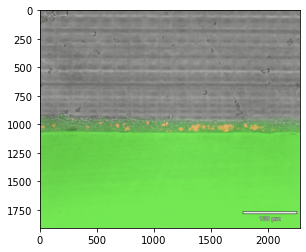

13038159


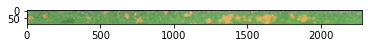

the overall cell viability is 0.8398997775675606


In [69]:
image_data = imread("uncropped_Day 6_0005_zoverlay.jpg")
# image_data = imread("Day 6_0003_zoverlay.jpg")
plt.imshow(image_data)
plt.show()
print(image_data.size)

all_r = []
all_g = []
all_b = []
sum_rgb = []
row_num = 0
stop_row = None
start_row = None

for row in range(len(image_data)):
    r_current_row = []
    b_current_row = []
    for column in range(len(image_data[row])):
        r = int(image_data[row][column][0])
        g = int(image_data[row][column][1])
        b = int(image_data[row][column][2])
        all_r.append(r)
        all_g.append(g)
        all_b.append(b)
        r_current_row.append(r)
        b_current_row.append(b)
        sum_rgb.append(r+g+b)
    
    # when it starts to be not blue(grey)
    if int(statistics.mean(b_current_row)) <= 112 and start_row is None:
        start_row = row_num
    # when it starts to be not red(dentin region)    
    if int(statistics.mean(r_current_row)) <= 101 and start_row is not None and start_row < row_num:
        stop_row = row_num
        break

    row_num += 1

if stop_row is not None and start_row is not None:
    image_data = image_data[start_row:stop_row, :]

plt.imshow(image_data)
plt.show()

dead_count = 0
overall_count = 0

for row in range(len(image_data)):
    for column in range(len(image_data[row])):
        if image_data[row][column][2] >= 120:
            image_data[row][column][0] = 255
            image_data[row][column][1] = 255
            image_data[row][column][2] = 255
            continue
        elif image_data[row][column][0] >= 140: 
            image_data[row][column][0] = 255
            image_data[row][column][1] = 0
            image_data[row][column][2] = 0
            dead_count+=1
        overall_count+=1

print(f"the overall cell viability is {1-dead_count/overall_count}")

972


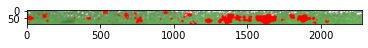

In [70]:
plt.imshow(image_data)
print(start_row)